<a href="https://colab.research.google.com/github/viniciusds2020/ia_forecast_chronos_amazon/blob/main/ia_forecast_chronos_amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forecast - Amazon Chronos T5 Large
---

O modelo Chronos - Amazon T5 Large é uma versão aprimorada do modelo T5 (Text-To-Text Transfer Transformer) da Amazon, adaptado para tarefas de processamento de linguagem natural (PLN) de alta performance. O T5 foi inicialmente desenvolvido pelo Google e é conhecido por sua abordagem unificada de tratar todas as tarefas de PLN como um problema de transformação de texto para texto, onde a entrada e a saída são sequências de texto.

### Configuração do ambiente

In [ ]:
!pip install --quiet git+https://github.com/amazon-science/chronos-forecasting.git

### Dependências

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from chronos import ChronosPipeline

### Modelo Chronos - Amazon T5 large

In [ ]:
pipeline = ChronosPipeline.from_pretrained(
  "amazon/chronos-t5-large",
  device_map="cuda",
  torch_dtype=torch.bfloat16,
)

### Entrada de dados

In [33]:
df = pd.read_csv("https://raw.githubusercontent.com/NIKHILKAMMARI/Time_Series_Analysis/main/Microsoft_Stock.csv")

### Previsões

In [35]:
# context must be either a 1D tensor, a list of 1D tensors,
# or a left-padded 2D tensor with batch as the first dimension
context = torch.tensor(df["Close"])
prediction_length = 64
forecast = pipeline.predict(context, prediction_length)  #shape [num_series, num_samples, prediction_length]

### Visualização do forecast

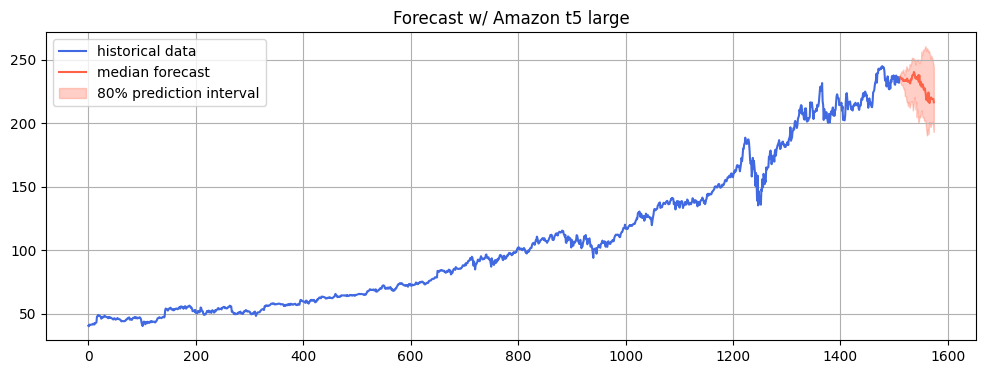

In [44]:
forecast_index = range(len(df), len(df) + prediction_length)
low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)

plt.figure(figsize=(12, 4))
plt.plot(df["Close"], color="royalblue", label="historical data")
plt.plot(forecast_index, median, color="tomato", label="median forecast")
plt.fill_between(forecast_index, low, high, color="tomato", alpha=0.3, label="80% prediction interval")
plt.legend()
plt.grid()
plt.title("Forecast w/ Amazon t5 large")
plt.show()
